Title: Revealing the Predominant Topic in WHO Speeches (2000–2024): An Investigation Based on Topic Modeling and Clustering


Research Question: What is the most explored topic in WHO speeches between 2000 and 2024?


Objectives: 1. To find keywords and recurrent themes in WHO talks over time
2. To use NER to extract important named entities (such as nations, illnesses, and organizations).
3. To use topic modeling to identify abstract themes and their development.
4. To arrange related thematic speeches for trend analysis using clustering.
5. To present findings with visualizations such as bar charts, word clouds, pie charts, and heatmaps.
6. To interpret results in alignment with WHO's known health priorities.
7. To discuss how these methods help the audience understand global health communication


Methodology: Named Entity Recognition (NER), Frequent Word Analysis, Topic Modeling (LDA),

Clustering (K-means), Principal Component Analysis (PCA) for Word Clusters

In [ ]:
!pip install nltk gensim wordcloud scikit-learn matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 951.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 7.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from google.colab import files

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the punkt_tab data package

# Upload corpus file
uploaded = files.upload()

# Process uploaded file
for filename, data in uploaded.items():
    corpus = data.decode('utf-8')

    # Preprocessing
    corpus_clean = re.sub(r'\s+', ' ', corpus.lower())  # Normalize spaces
    corpus_clean = re.sub(r'[^a-zA-Z\s]', '', corpus_clean)  # Keep only letters and spaces

    # Tokenization and stop word removal
    tokens = word_tokenize(corpus_clean)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w for w in tokens if w.lower() not in stop_words and len(w) > 3]

    print(filtered_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Saving corpus.txt to corpus.txt
['good', 'morning', 'good', 'afternoon', 'good', 'evening', 'last', 'media', 'briefing', 'spoke', 'impact', 'recent', 'funding', 'cuts', 'global', 'health', 'since', 'compiled', 'feedback', 'countries', 'understand', 'impact', 'support', 'countries', 'need', 'mitigate', 'results', 'show', 'severe', 'disruptions', 'health', 'services', 'almost', 'threequarters', 'countries', 'closures', 'health', 'facilities', 'quarter', 'countries', 'also', 'increased', 'outofpocket', 'payments', 'health', 'services', 'quarter', 'country', 'offices', 'also', 'report', 'losses', 'health', 'care', 'workers', 'disruptions', 'information', 'systems', 'supply', 'medicines', 'health', 'products', 'response', 'countries', 'revising', 'budgets', 'cutting', 'costs', 'strengthening', 'fundraising', 'partnerships', 'working', 'countries', 'many', 'years', 'support', 'transition', 'away', 'dependency', 'sustainable', 'selfreliance', 'based', 'domestic', 'resources', 'supporting', 'c

This code filters short words, eliminates stopwords, converts to lowercase, and removes punctuation from uploaded text.  The cleaned text is then used to print helpful tokens.

In [2]:
!pip install spacy
!python -m spacy download en_core_web_md

import spacy
nlp = spacy.load("en_core_web_md")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 38.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
import os
import spacy
import csv

# Load spaCy model
nlp = spacy.load("en_core_web_md")

# === STEP 1: Set the name of the file you want to process ===
filename = "corpus.txt"  # Change this as needed
file_path = os.path.join("/content", filename)

# === STEP 2: Read the file and run NER ===
with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()
    doc = nlp(text)

    print(f"\nNamed Entities in {filename}:\n")
    for ent in doc.ents:
        print(f"{ent.text} ({ent.label_})")

# === STEP 3: Save the NER results to a CSV ===
output1_csv = f"/content/{filename}_ner_results.csv"  # Output filename includes original filename

with open(output1_csv, "w", newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Entity", "Label"])
    for ent in doc.ents:
        writer.writerow([ent.text, ent.label_])

print(f"\n✅ Results saved to: {output1_csv}")
from google.colab import files
files.download(output1_csv)


Named Entities in corpus.txt:

morning (TIME)
afternoon (TIME)
evening (TIME)
more than 100 (CARDINAL)
almost three-quarters (CARDINAL)
one quarter (DATE)
one quarter (DATE)
many years (DATE)
South Africa’s (GPE)
an additional US$1.5 billion (MONEY)
this year (DATE)
Nigeria (GPE)
an additional US$200 million (MONEY)
2025 (CARDINAL)
Kenya (GPE)
health ministry (ORG)
an additional US$250 million (MONEY)
the National Treasury (ORG)
Ghana (GPE)
First (ORDINAL)
Second (ORDINAL)
Third (ORDINAL)
one (CARDINAL)
one (CARDINAL)
one (CARDINAL)
fourth (ORDINAL)
Colombia (GPE)
Gambia (GPE)
Philippines (GPE)
South Africa (GPE)
Sri Lanka (GPE)
Timor Leste (PERSON)
Thailand (GPE)
recent years (DATE)
Gaza (GPE)
the 2nd of March (DATE)
Gaza (GPE)
the past week (DATE)
75% (PERCENT)
UN (ORG)
Gaza (GPE)
six weeks (DATE)
two to four weeks (DATE)
180 000 (CARDINAL)
60 000 (CARDINAL)
almost 400 000 (CARDINAL)
almost 1500 (CARDINAL)
500 (CARDINAL)
October 2023 (DATE)
more than 400 (CARDINAL)
the 23rd of March

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

reads a text file, extracts named entities (such as names and locations) using spaCy, and then outputs the results.  After that, a CSV file containing these entities and their labels is saved for download.

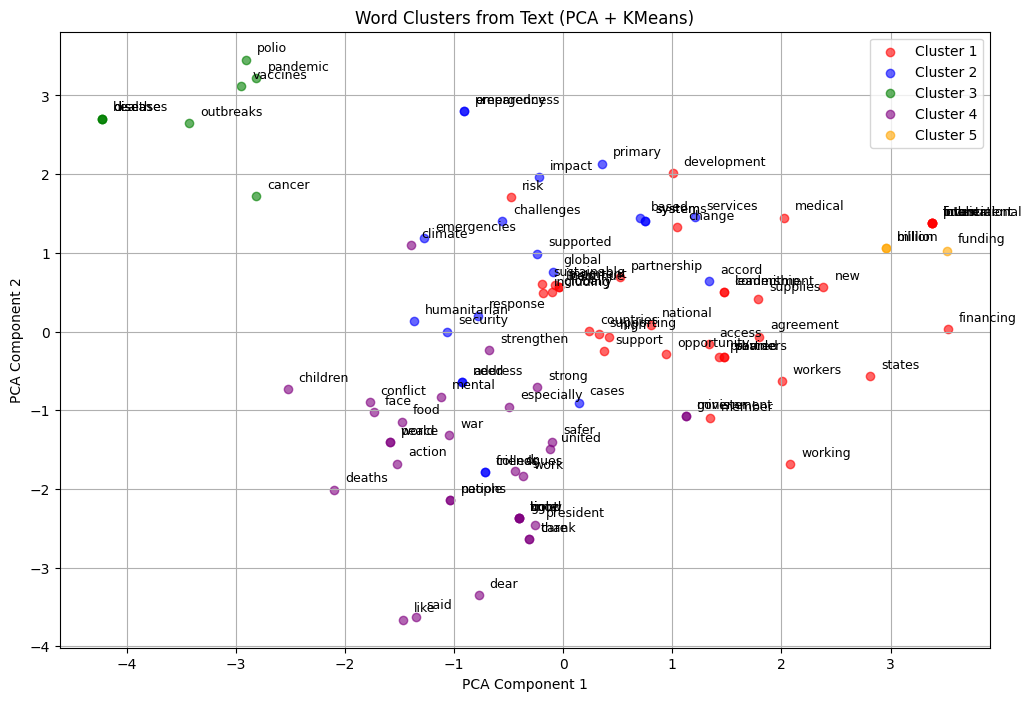

In [3]:
import spacy
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load spaCy model with word vectors
nlp = spacy.load("en_core_web_md")

# Read the text
filename = "corpus.txt"
file_path = f"/content/{filename}"

with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()
doc = nlp(text)

# Filter tokens: real words, not stopwords/punct/digits/named entities
named_entities = {ent.text for ent in doc.ents}

words = [
    token.text.lower()
    for token in doc
    if token.is_alpha
    and not token.is_stop
    and token.text not in named_entities
]

# Get top 100 frequent words
top_words = [word for word, _ in Counter(words).most_common(100)]

# Get word vectors
word_vecs = np.array([nlp(word).vector for word in top_words if nlp(word).has_vector])
filtered_words = [word for word in top_words if nlp(word).has_vector]

# Clustering with KMeans
num_clusters = 5  # You can adjust this
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init='auto')
labels = kmeans.fit_predict(word_vecs)

# Reduce dimensions for plotting
pca = PCA(n_components=2)
reduced = pca.fit_transform(word_vecs)

# Plot
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(num_clusters):
    xs = reduced[labels == i, 0]
    ys = reduced[labels == i, 1]
    plt.scatter(xs, ys, color=colors[i], label=f'Cluster {i+1}', alpha=0.6)

# Add word labels
for i, word in enumerate(filtered_words):
    plt.text(reduced[i, 0]+0.1, reduced[i, 1]+0.1, word, fontsize=9)

plt.title("Word Clusters from Text (PCA + KMeans)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

To demonstrate word similarity, it extracts common terms from the text, builds word vectors, clusters them using KMeans, and displays them in a scatter plot using PCA.



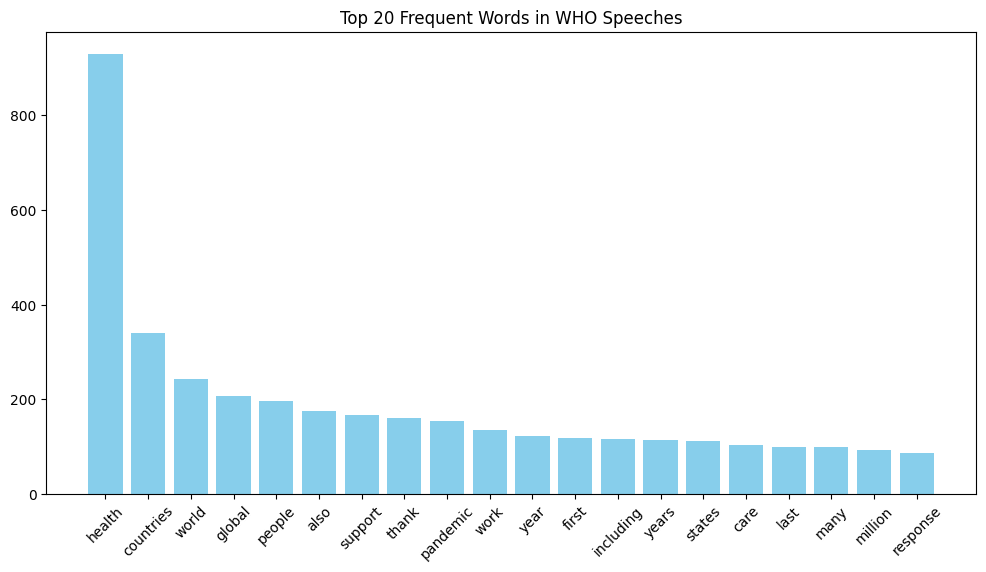

In [5]:
from collections import Counter
import matplotlib.pyplot as plt

freq_dist = Counter(filtered_tokens)
common_words = freq_dist.most_common(20)

# Plot Bar Chart
words, counts = zip(*common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Frequent Words in WHO Speeches")
plt.show()


After eliminating stopwords and short words, this chart displays the top 20 terms from the WHO talks.The words themselves are displayed on the x-axis, while the frequency of each appearance is displayed on the y-axis.These common terms, such as health,pandemic,people,etc., can be used to highlight major themes.Words like virus,global,vaccine, or response, for instance, that appear near the top, denote the main topic of WHO messages.

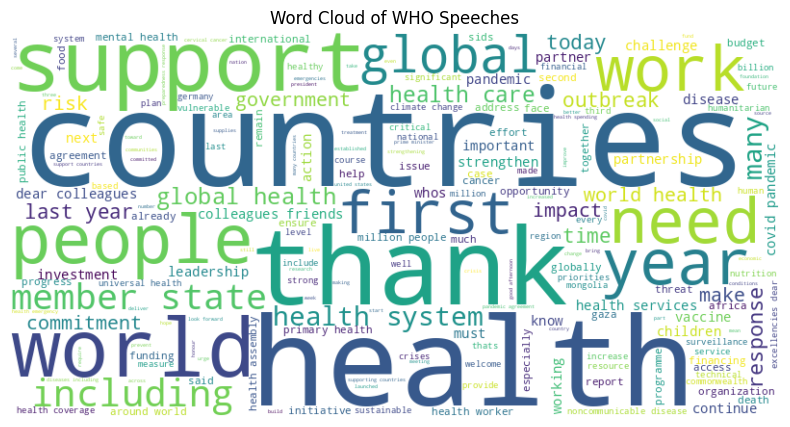

In [6]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of WHO Speeches")
plt.show()


Word size is used to illustrate frequency in the word cloud rather than a bar chart, larger words are displayed more frequently.This graphic provides a rapid, intuitive sense of the most important subjects or issues and The creative scattering of words makes it simpler to quickly identify key terms.

In [7]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [8]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import io  # For handling uploaded files in Colab

# Download necessary NLTK data
nltk.download("punkt")
nltk.download("stopwords")

# Preprocess function (using NLTK)
def preprocess_nltk(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))  # Default NLTK stopwords
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

# Option 1: Read from 'corpus.txt'
try:
    with open("corpus.txt", "r", encoding="utf-8") as f:
        text = f.read()
    print("Successfully read from 'corpus.txt'")

except FileNotFoundError:
    print("'corpus.txt' not found. Switching to file upload option.")

    # Option 2: File upload in Colab
    from google.colab import files
    uploaded = files.upload()  # This will prompt you to upload a file
    filename = list(uploaded.keys())[0]  # Get the filename of the uploaded file
    text = io.StringIO(uploaded[filename].decode("utf-8")).read()
    print(f"Successfully read uploaded file: {filename}")

# Split into paragraphs (or chapters)
paragraphs = [p.strip() for p in text.split("\n") if len(p.strip()) > 30]  # Avoid tiny paragraphs

# Preprocess each paragraph with NLTK
processed_paragraphs = [preprocess_nltk(para) for para in paragraphs]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Successfully read from 'corpus.txt'


In [9]:
# Step 2: CountVectorizer to convert text to a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(processed_paragraphs)

In [10]:
# Step 3: LDA Topic Modeling
num_topics = 5  # Start with 2 or 3 topics
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [11]:
# Step 4: Display Topics
feature_names = vectorizer.get_feature_names_out()

def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}: ", " | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Show topics
display_topics(lda_model, feature_names, 10)


Topic 1:  health | diseases | supplies | people | including | countries | emergency | medical | world | gaza

Topic 2:  health | countries | people | year | global | million | world | states | cases | cancer

Topic 3:  thank | world | work | global | colleagues | health | member | dear | friends | states

Topic 4:  health | countries | peace | year | covid | world | disease | services | pandemic | including

Topic 5:  health | support | world | pandemic | countries | response | care | global | good | systems


By combining related terms that commonly occur together, LDA Topics helps you find the primary themes or subjects in your data.  Every topic is made up of a group of closely related terms that let you deduce the issue's main idea.This method aids in identifying underlying themes and patterns in huge text datasets.

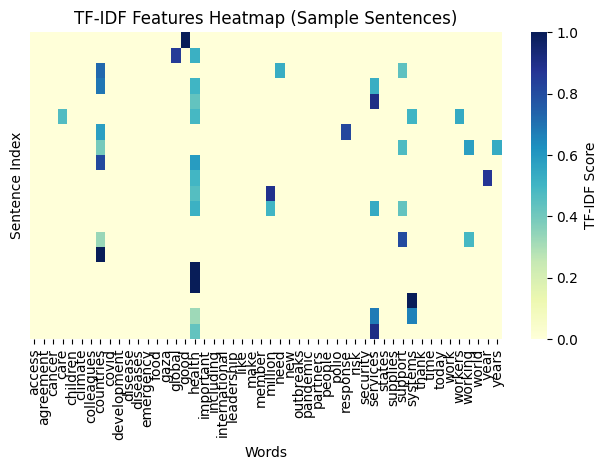

In [14]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

# Assuming 'processed_paragraphs' is available from your previous code

# 1. Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=50, stop_words='english')
# max_features limits the vocabulary size for better visualization
# stop_words removes common English words

# 2. Fit the vectorizer to your data and create the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(processed_paragraphs)

# 3. Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# 4. (Optional) Print TF-IDF scores for a specific document
# You can replace 0 with the index of the document you're interested in
#print("TF-IDF scores for document 0:")
#for i in range(len(feature_names)):
#    print(f"{feature_names[i]}: {tfidf_matrix[0, i]}")

# 5. Visualize using a heatmap (first 20 documents)
sns.heatmap(tfidf_matrix[:20].toarray(), cmap='YlGnBu', yticklabels=False,
            xticklabels=feature_names,  # Add feature names to x-axis
            cbar_kws={'label': 'TF-IDF Score'})  # Label the colorbar

plt.title("TF-IDF Features Heatmap (Sample Sentences)")
plt.xlabel("Words")
plt.ylabel("Sentence Index")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

The significance of each word in each sentence or text is graphically displayed by the TF-IDF heatmap.  Higher relevance is shown by darker hues, indicating that the word is crucial to that particular sentence.  This makes it easier to determine which terms are most important and pertinent in your writing across several publications.